In [69]:
# Dependencies
import pandas as pd
from sqlalchemy import *
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from datetime import date
from sqlalchemy.orm import Session

In [2]:
# Set vacation dates
vacation_days = pd.date_range(pd.datetime(2017,8,10),periods=4).tolist()
for i in range(0,len(vacation_days)):
    vacation_days[i] = vacation_days[i].strftime('%Y-%m-%d')
vacation_days

['2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13']

In [3]:
# Create an engine to connecting to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['hawaii_measurement', 'hawaii_station']

In [5]:
Measurement = Base.classes.hawaii_measurement

In [6]:
Station = Base.classes.hawaii_station

In [7]:
# Create a session for the engine
session = Session(engine)

In [12]:
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-18').all()

In [17]:
date = [pd.to_datetime(x[0]) for x in prcp_data]
date

[Timestamp('2016-08-19 00:00:00'),
 Timestamp('2016-08-20 00:00:00'),
 Timestamp('2016-08-21 00:00:00'),
 Timestamp('2016-08-22 00:00:00'),
 Timestamp('2016-08-23 00:00:00'),
 Timestamp('2016-08-24 00:00:00'),
 Timestamp('2016-08-25 00:00:00'),
 Timestamp('2016-08-26 00:00:00'),
 Timestamp('2016-08-27 00:00:00'),
 Timestamp('2016-08-28 00:00:00'),
 Timestamp('2016-08-29 00:00:00'),
 Timestamp('2016-08-30 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-09-02 00:00:00'),
 Timestamp('2016-09-03 00:00:00'),
 Timestamp('2016-09-04 00:00:00'),
 Timestamp('2016-09-07 00:00:00'),
 Timestamp('2016-09-08 00:00:00'),
 Timestamp('2016-09-09 00:00:00'),
 Timestamp('2016-09-10 00:00:00'),
 Timestamp('2016-09-11 00:00:00'),
 Timestamp('2016-09-12 00:00:00'),
 Timestamp('2016-09-13 00:00:00'),
 Timestamp('2016-09-14 00:00:00'),
 Timestamp('2016-09-15 00:00:00'),
 Timestamp('2016-09-16 00:00:00'),
 Timestamp('2016-09-17 00:00:00'),
 Timestamp('2016-09-

In [14]:
prcp = [x[1] for x in prcp_data]
prcp

[0.04,
 0,
 0.12,
 0.4,
 0,
 0.08,
 0.08,
 0,
 0,
 0.01,
 0,
 0,
 0.13,
 0,
 0,
 0,
 0.03,
 0.05,
 0,
 0.03,
 0,
 0.05,
 0,
 0.02,
 1.32,
 0.42,
 0.06,
 0.05,
 0,
 0,
 0,
 0,
 0.02,
 0,
 0,
 0,
 0.06,
 0.02,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.01,
 0,
 0,
 0,
 0.05,
 0.15,
 0.01,
 0,
 0.03,
 0,
 0,
 0,
 0,
 0.24,
 0.03,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.03,
 0.05,
 0.01,
 0.13,
 0.14,
 0.05,
 0.05,
 0.05,
 0,
 0.01,
 0,
 0.14,
 0.12,
 0.03,
 0,
 0.03,
 0.43,
 0.02,
 0,
 0.03,
 0.52,
 0.05,
 0.04,
 0.01,
 0.05,
 0.03,
 0,
 0,
 0.01,
 0.13,
 0.01,
 0,
 0,
 0.01,
 0.01,
 0.01,
 0,
 0.02,
 0,
 0.02,
 0.04,
 0.12,
 0.01,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.16,
 0,
 0.04,
 0.03,
 0,
 0,
 0,
 0.18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.51,
 0,
 0,
 0,
 0.31,
 2.62,
 0.01,
 0,
 0,
 0.07,
 0,
 0,
 0,
 0,
 0.06,
 0.06,
 0.01,
 0,
 0.03,
 0,
 0,
 0,
 1.19,
 0.73,


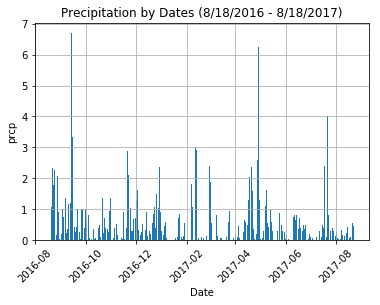

In [22]:
# Plot of prcp vs. Dates (Precipitation Analysis)
plt.bar(date,prcp)
plt.xticks(rotation=45)
plt.title('Precipitation by Dates (8/18/2016 - 8/18/2017)')
plt.xlabel('Date')
plt.ylabel('prcp')
plt.grid()
plt.show()

In [24]:
# Summary Statistics for prcp_data
prcp_df = pd.DataFrame({'date': date,
                        'prcp': prcp})
prcp_df.describe()

,prcp
count,2043.000000
mean,0.180504
std,0.465010
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# This query determines how many stations there are
num_station = session.query(Measurement.station.distinct())
num_station.count()

9

In [34]:
# This query determines list the amount of stations and the observation counts
station_obs = session.query(Measurement.station.distinct(), func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [35]:
station_list = [x[0] for x in station_obs]
station_list

['USC00519281',
 'USC00513117',
 'USC00519397',
 'USC00519523',
 'USC00516128',
 'USC00514830',
 'USC00511918',
 'USC00517948',
 'USC00518838']

In [36]:
station_count = [x[1] for x in station_obs]
station_count

[2772, 2696, 2685, 2572, 2484, 1937, 1932, 683, 342]

In [37]:
station_obs_df = pd.DataFrame({'station': station_list,
                              'frequency': station_count})
station_obs_df

,frequency,station
0,2772,USC00519281
1,2696,USC00513117
2,2685,USC00519397
3,2572,USC00519523
4,2484,USC00516128
5,1937,USC00514830
6,1932,USC00511918
7,683,USC00517948
8,342,USC00518838


In [59]:
# This query retrieve the last 12 months of termperature observation data of the station with the highest number of temperature observation
station_tobs = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date > '2016-08-18').all()

In [60]:
tobs_data = [x[0] for x in station_tobs]
tobs_data

[79,
 81,
 79,
 78,
 77,
 77,
 80,
 80,
 75,
 73,
 78,
 77,
 78,
 80,
 80,
 78,
 78,
 78,
 73,
 74,
 80,
 79,
 77,
 80,
 76,
 79,
 75,
 79,
 78,
 79,
 78,
 78,
 76,
 74,
 77,
 78,
 79,
 79,
 77,
 80,
 78,
 78,
 78,
 77,
 79,
 79,
 79,
 79,
 75,
 76,
 73,
 72,
 71,
 77,
 79,
 78,
 79,
 77,
 79,
 77,
 78,
 78,
 78,
 78,
 77,
 74,
 75,
 76,
 73,
 76,
 74,
 77,
 76,
 76,
 74,
 75,
 75,
 75,
 75,
 71,
 63,
 70,
 68,
 67,
 77,
 74,
 77,
 76,
 76,
 75,
 76,
 75,
 73,
 75,
 73,
 75,
 74,
 75,
 74,
 75,
 73,
 75,
 73,
 73,
 74,
 70,
 72,
 70,
 67,
 67,
 69,
 70,
 68,
 69,
 69,
 66,
 65,
 68,
 62,
 75,
 70,
 69,
 76,
 76,
 74,
 73,
 71,
 74,
 74,
 72,
 71,
 72,
 74,
 69,
 67,
 72,
 70,
 64,
 63,
 63,
 62,
 70,
 70,
 62,
 62,
 63,
 65,
 69,
 77,
 70,
 74,
 69,
 72,
 71,
 69,
 71,
 71,
 72,
 72,
 69,
 70,
 66,
 65,
 69,
 68,
 68,
 68,
 59,
 60,
 70,
 73,
 75,
 64,
 59,
 59,
 62,
 68,
 70,
 73,
 79,
 75,
 65,
 70,
 74,
 70,
 70,
 71,
 71,
 71,
 69,
 61,
 67,
 65,
 72,
 71,
 73,
 72,
 77,
 73,
 67,


In [61]:
tobs_df = pd.DataFrame({'tobs': tobs_data})
tobs_df

,tobs
0,79
1,81
2,79
3,78
4,77
5,77
6,80
7,80
8,75
9,73


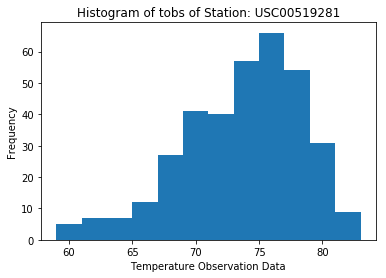

In [68]:
# Histogram (Station Analysis)
plt.hist(tobs_data, bins=12)
plt.title('Histogram of tobs of Station: USC00519281')
plt.xlabel('Temperature Observation Data')
plt.ylabel('Frequency')
plt.show()

In [139]:
def calc_temps(start, end):
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    start_record = date(start_date.year - 1, start_date.month, start_date.day)
    end_record = date(end_date.year - 1, end_date.month, end_date.day)
    temperature_data = session.query(Measurement.tobs).filter(Measurement.date >= start_record).filter(Measurement.date <= end_record).all()
    temp_data = [x[0] for x in temperature_data]
    temp_df = pd.DataFrame({'Temp': temp_data})
    avg = temp_df.mean()
    max_temp = (temp_df.max() - avg)
    min_temp = (avg - temp_df.min())
    plt.bar(1,avg, width=2, yerr=[min_temp,max_temp])
    plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    plt.title('Trip Average Temperature')
    plt.ylabel('Temp (F)')
    plt.show()

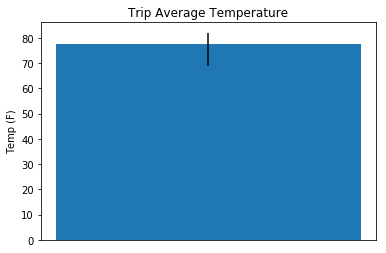

In [140]:
calc_temps('2018-07-06','2018-07-14')